# Sparse Matrices

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import sparse
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('notebook', font_scale=1.5)

## Creating a sparse matrix

There are many applications in which we deal with matrices that are mostly zeros. For example, a matrix representing social networks is very sparse - there are 7 billion people, but most people are only connected to a few hundred or thousand others directly. Storing such a social network as a sparse rather than dense matrix  will offer orders of magnitude reductions in memory requirements and corresponding speed-ups in computation.

### Coordinate format

The simplest sparse  matrix format is built from the coordinates and values of the non-zero entries.

#### From dense matrix

In [3]:
A = np.random.poisson(0.2, (5,15)) * np.random.randint(0, 10, (5, 15))
A

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
       [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
rows, cols = np.nonzero(A)
vals = A[rows, cols]

In [6]:
vals

array([1, 1, 2, 2, 2, 1, 4, 2, 2])

In [7]:
rows

array([0, 0, 0, 1, 1, 1, 2, 2, 3])

In [8]:
cols

array([ 0,  8, 10,  3,  8, 13,  0, 10,  5])

In [12]:
# Sparse.coo_matrix: Stores sparse matrix in COOrdinate format
X1 = sparse.coo_matrix(A)
X1

<5x15 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in COOrdinate format>

In [13]:
print(X1)

  (0, 0)	1
  (0, 8)	1
  (0, 10)	2
  (1, 3)	2
  (1, 8)	2
  (1, 13)	1
  (2, 0)	4
  (2, 10)	2
  (3, 5)	2


#### From coordinates

Note that the (values, (rows, cols)) argument is a single tuple.

In [14]:
X2 = sparse.coo_matrix((vals, (rows, cols)))
X2

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in COOrdinate format>

In [15]:
print(X2)

  (0, 0)	1
  (0, 8)	1
  (0, 10)	2
  (1, 3)	2
  (1, 8)	2
  (1, 13)	1
  (2, 0)	4
  (2, 10)	2
  (3, 5)	2


#### Convert back to dense matrix

In [16]:
X2.todense()

matrix([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]])

## Compressed Sparse Row and Column formats

**Not entirely sure. But you can covert to these formats from a COO format**

When we have repeated entries in the rows or cols, we can remove the redundancy by indicating the  location of the  first occurrence of a value and its increment instead of the full coordinates. These are known as CSR or CSC formats.

In [19]:
np.vstack([rows, cols])

array([[ 0,  0,  0,  1,  1,  1,  2,  2,  3],
       [ 0,  8, 10,  3,  8, 13,  0, 10,  5]])

In [20]:
indptr = np.r_[np.searchsorted(rows, np.unique(rows)), len(rows)]
indptr

array([0, 3, 6, 8, 9])

In [21]:
X3 = sparse.csr_matrix((vals, cols, indptr))
X3

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [22]:
print(X3)

  (0, 0)	1
  (0, 8)	1
  (0, 10)	2
  (1, 3)	2
  (1, 8)	2
  (1, 13)	1
  (2, 0)	4
  (2, 10)	2
  (3, 5)	2


In [23]:
X3.todense()

matrix([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]])

#### Casting from COO format

Because the coordinate format is more intuitive, it is often more convenient to first create a COO matrix then cast to CSR or CSC form.

In [24]:
X4 = X2.tocsr()

In [25]:
X4

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

## COO summation convention

When entries are repeated in a sparse matrix, they are **summed**. This provides a quick way to construct confusion matrices for evaluation of multi-class  classification algorithms.

In [26]:
rows = np.repeat([0,1], 4)
cols = np.repeat([0,1], 4)
vals = np.arange(8)

In [27]:
rows

array([0, 0, 0, 0, 1, 1, 1, 1])

In [28]:
cols

array([0, 0, 0, 0, 1, 1, 1, 1])

In [29]:
vals

array([0, 1, 2, 3, 4, 5, 6, 7])

In [30]:
X5 = sparse.coo_matrix((vals, (rows, cols)))

In [31]:
X5.todense()

matrix([[ 6,  0],
        [ 0, 22]])

#### Creating a 2 by 2 confusion matrix

In [32]:
obs = np.random.randint(0, 2, 100)
pred = np.random.randint(0, 2, 100)
vals = np.ones(100).astype('int')

In [33]:
pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
vals.shape, obs.shape , pred.shape

((100,), (100,), (100,))

In [35]:
X6 = sparse.coo_matrix((vals, (pred, obs)))

In [38]:
X6.todense()

matrix([[20, 33],
        [27, 20]])

#### Creating an $n$ by $n$ confusion matrix

For classifications with a large number of classes (e.g. image segmentation),  the savings are even more dramatic.

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [40]:
iris = datasets.load_iris()

In [41]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.5, random_state=42)

In [42]:
pred = knn.fit(X_train, y_train).predict(X_test)

In [43]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 1])

In [44]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 0, 2, 2, 1])

In [45]:
X7 = sparse.coo_matrix((np.ones(len(pred)).astype('int'), (pred, y_test)))
pd.DataFrame(X7.todense(), index=iris.target_names, columns=iris.target_names)

setosa  versicolor  virginica
setosa          29           0          0
versicolor       0          23          4
virginica        0           0         19

In [46]:
X7.todense()

matrix([[29,  0,  0],
        [ 0, 23,  4],
        [ 0,  0, 19]])

## Solving large sparse linear systems

SciPy provides efficient routines for solving large sparse systems as for dense matrices. We will illustrate by calculating the page rank  for airports using data from the [Bureau of Transportation Statisitcs](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236). The [PageRank](https://en.wikipedia.org/wiki/PageRank) algorithm is used to rank web pages for search results, but it can be used to rank any node in a directed graph (here we have airports instead of web pages). PageRank is fundamentally about finding the steady state in a Markov chain and can be solved as a linear system.

The update at each time step for the page rank $PR$ of a page $p_i$ is 

![i0](https://wikimedia.org/api/rest_v1/media/math/render/svg/8a8c0a807f62331cc1740dd6c0f28ac1809926c7)

The PageRank algorithm assumes that every node can be reached from every other node. To guard against case where a node has out-degree 0, we allow every node a small random chance of transitioning to any other node using a damping factor $R$. Then we solve  the linear system  to find the pagerank score $R$.

![i1](https://wikimedia.org/api/rest_v1/media/math/render/svg/6bb0f1469218a064274fd4691143e9ce64639dc2)

In matrix notation, this is

![i2](https://wikimedia.org/api/rest_v1/media/math/render/svg/96265e6c41318e793194287f36b5f929075bb876)

At steady state,

![i3](https://wikimedia.org/api/rest_v1/media/math/render/svg/65d2fed50688deaca4640b117c88a9e7a3c2ef0d)

and we can rearrange terms to solve for $R$

![i4](https://wikimedia.org/api/rest_v1/media/math/render/svg/985f19f0c6b69d3a8afb5acc38339ebe4915baa7)

In [47]:
data = pd.read_csv('../data/airports.csv', usecols=[0,1])

In [48]:
data.shape

(445827, 2)

In [49]:
data.head()

ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID
0              10135            10397
1              10135            10397
2              10135            10397
3              10135            10397
4              10135            10397

In [50]:
lookup = pd.read_csv('../data/names.csv', index_col=0)

In [51]:
lookup.shape

(6404, 1)

In [52]:
lookup.head()

Description
Code                                                
10001         Afognak Lake, AK: Afognak Lake Airport
10003  Granite Mountain, AK: Bear Creek Mining Strip
10004                       Lik, AK: Lik Mining Camp
10005         Little Squaw, AK: Little Squaw Airport
10006                     Kizhuyak, AK: Kizhuyak Bay

In [53]:
import networkx as nx

#### Construct the sparse adjacency matrix

In [ ]:
nx.convert_matrix.from_pandas_dataframe

In [55]:
g = nx.from_pandas_edgelist(data, source='ORIGIN_AIRPORT_ID', target='DEST_AIRPORT_ID')

AttributeError: module 'networkx' has no attribute 'from_pandas_edgelist'

In [50]:
airports = np.array(g.nodes())
adj_matrix = nx.to_scipy_sparse_matrix(g)

#### Construct the transition matrix

In [51]:
out_degrees = np.ravel(adj_matrix.sum(axis=1))
diag_matrix = sparse.diags(1 / out_degrees).tocsr()
M = (diag_matrix @ adj_matrix).T

In [52]:
n = len(airports) 
d = 0.85 
I = sparse.eye(n, format='csc')
A = I - d * M
b = (1-d) / n * np.ones(n) # so the sum of all page ranks is 1

In [53]:
A.todense()

matrix([[ 1.        , -0.00537975, -0.0085    , ...,  0.        ,
          0.        ,  0.        ],
        [-0.28333333,  1.        , -0.0085    , ...,  0.        ,
          0.        ,  0.        ],
        [-0.28333333, -0.00537975,  1.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  1.        ]])

In [54]:
from scipy.sparse.linalg import spsolve

In [55]:
r =  spsolve(A, b)
r.sum()

0.9999999999999998

In [56]:
idx = np.argsort(r)

In [57]:
top10 = idx[-10:][::-1]
bot10 = idx[:10]

In [58]:
df = lookup.loc[airports[top10]]
df['degree'] = out_degrees[top10]
df['pagerank']= r[top10]
df

Description  degree  pagerank
Code                                                                      
10397  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...     158  0.043286
13930          Chicago, IL: Chicago O'Hare International     139  0.033956
11292                   Denver, CO: Denver International     129  0.031434
11298  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...     108  0.027596
13487  Minneapolis, MN: Minneapolis-St Paul Internati...     108  0.027511
12266  Houston, TX: George Bush Intercontinental/Houston     110  0.025967
11433            Detroit, MI: Detroit Metro Wayne County     100  0.024738
14869   Salt Lake City, UT: Salt Lake City International      78  0.019298
14771     San Francisco, CA: San Francisco International      76  0.017820
14107      Phoenix, AZ: Phoenix Sky Harbor International      79  0.017000

In [59]:
df = lookup.loc[airports[bot10]]
df['degree'] = out_degrees[bot10]
df['pagerank']= r[bot10]
df

Description  degree  pagerank
Code                                                                      
14025         Plattsburgh, NY: Plattsburgh International       1  0.000693
12265     Niagara Falls, NY: Niagara Falls International       1  0.000693
16218             Yuma, AZ: Yuma MCAS/Yuma International       1  0.000693
11695                   Flagstaff, AZ: Flagstaff Pulliam       1  0.000693
14905  Santa Maria, CA: Santa Maria Public/Capt. G. A...       1  0.000710
14487                     Redding, CA: Redding Municipal       1  0.000710
13964  North Bend/Coos Bay, OR: Southwest Oregon Regi...       1  0.000710
10157                          Arcata/Eureka, CA: Arcata       1  0.000710
11049        College Station/Bryan, TX: Easterwood Field       1  0.000711
12177                     Hobbs, NM: Lea County Regional       1  0.000711

#### Visualize the airport connections graph and label the top and bottom 5 airports by pagerank

/Users/cliburn/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


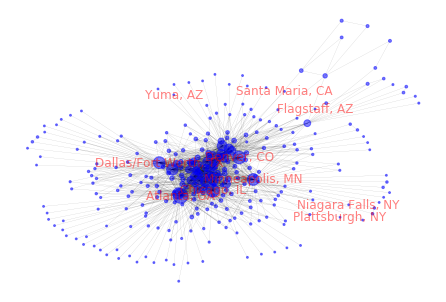

In [60]:
labels = {airports[i]: lookup.loc[airports[i]].str.split(':').str[0].values[0] 
          for i in np.r_[top10[:5], bot10[:5]]}
nx.draw(g, pos=nx.spring_layout(g), labels=labels, 
        node_color='blue', font_color='red', alpha=0.5,
        node_size=np.clip(5000*r, 1, 5000*r), width=0.1)